# Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# Load Dataset

In [2]:
data = load_wine()
X, y = data.data, data.target

In [3]:
''' Ubah X ke DataFrame '''
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
''' CEK INFO DATA '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
''' CEK STATISTIK DESKRIPTIF DATA '''
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
''' CEK MISSING VALUE DATA '''
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

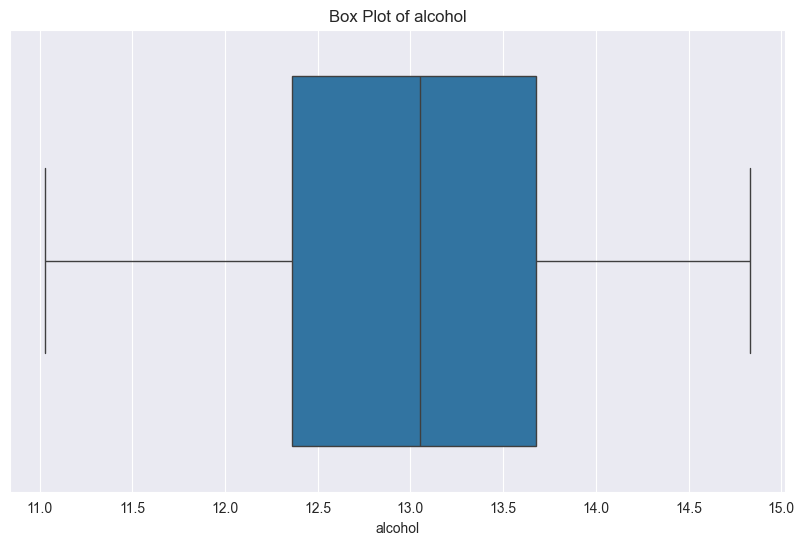

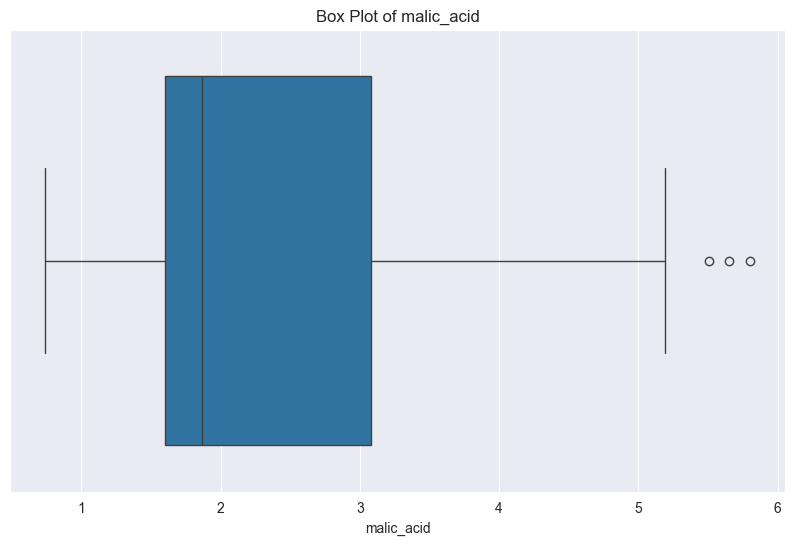

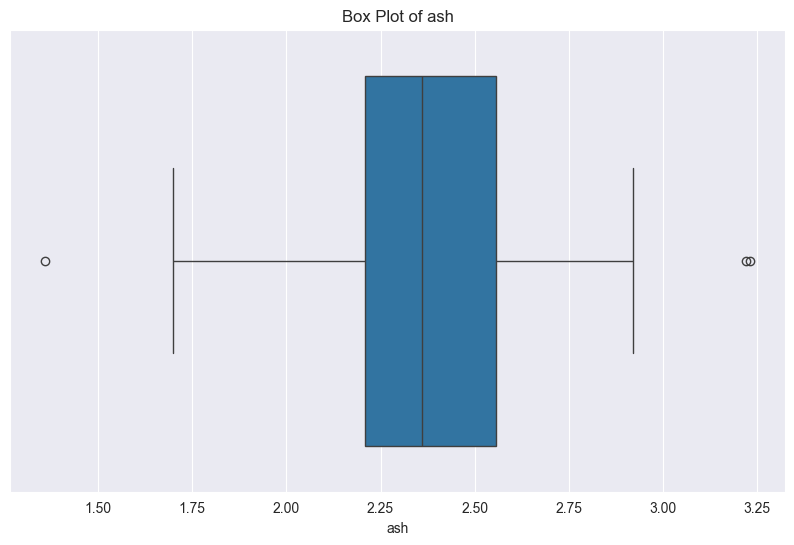

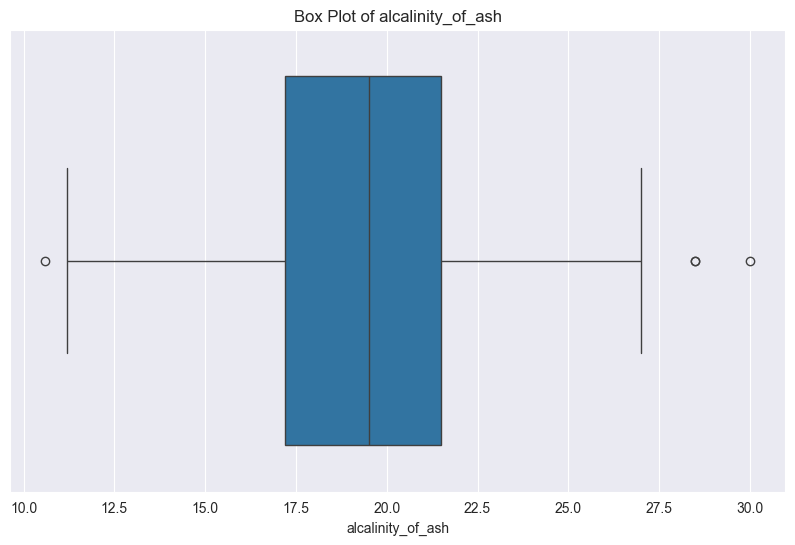

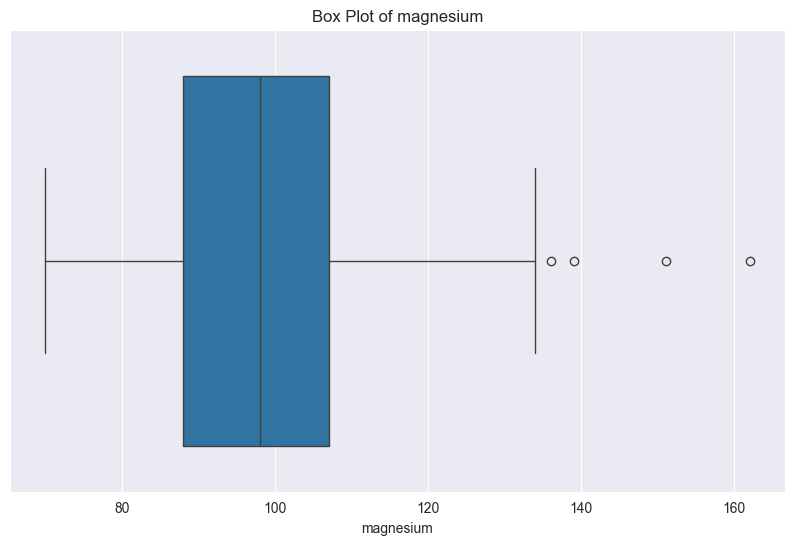

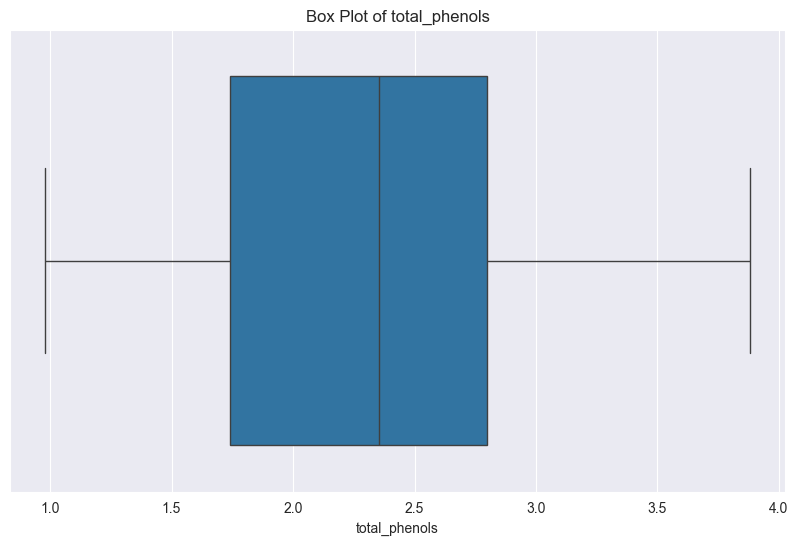

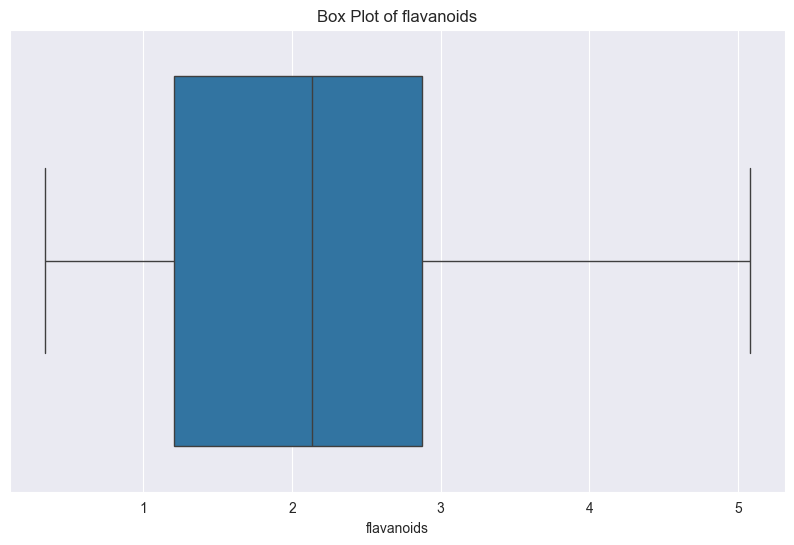

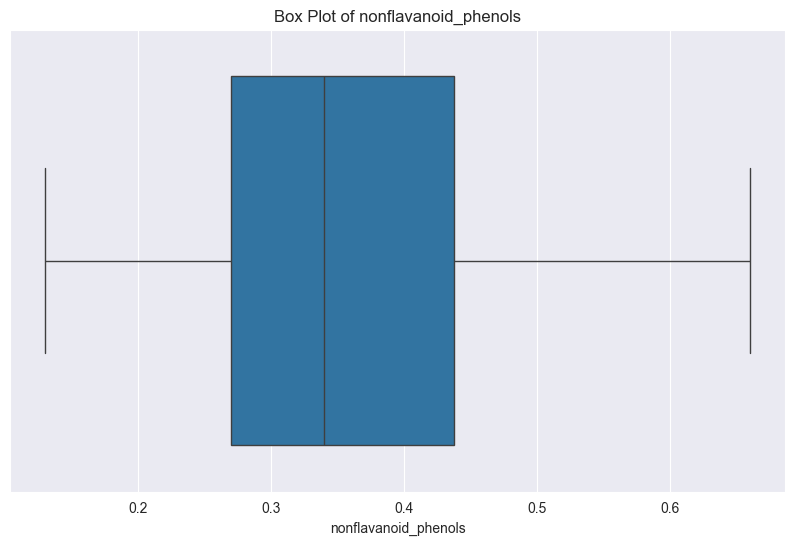

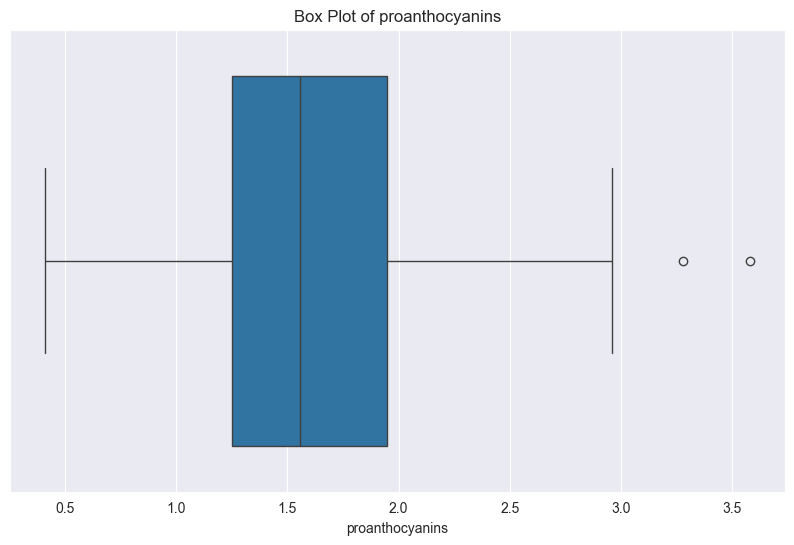

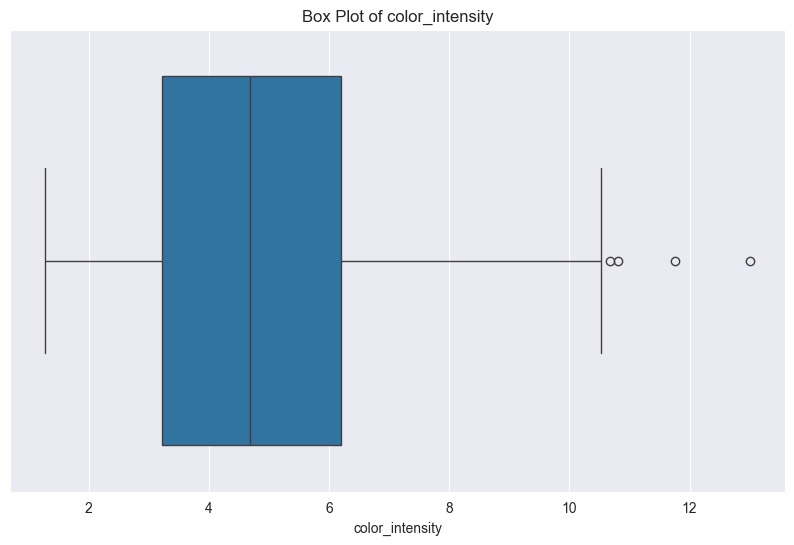

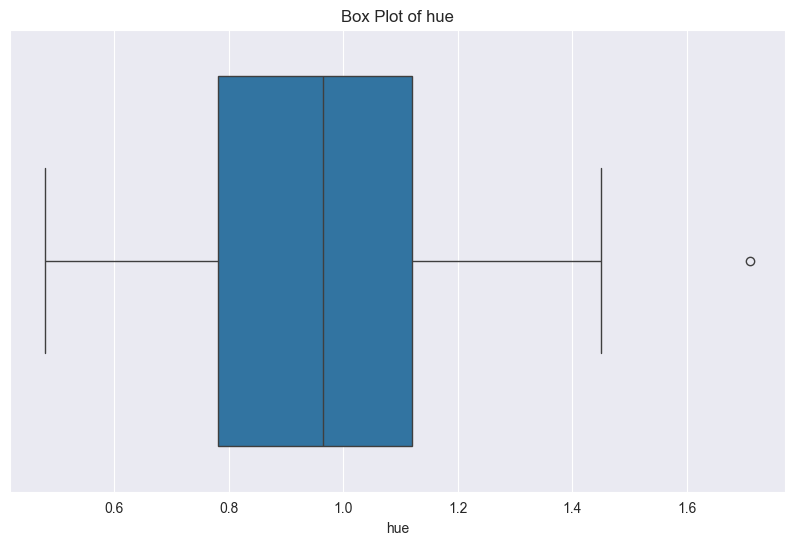

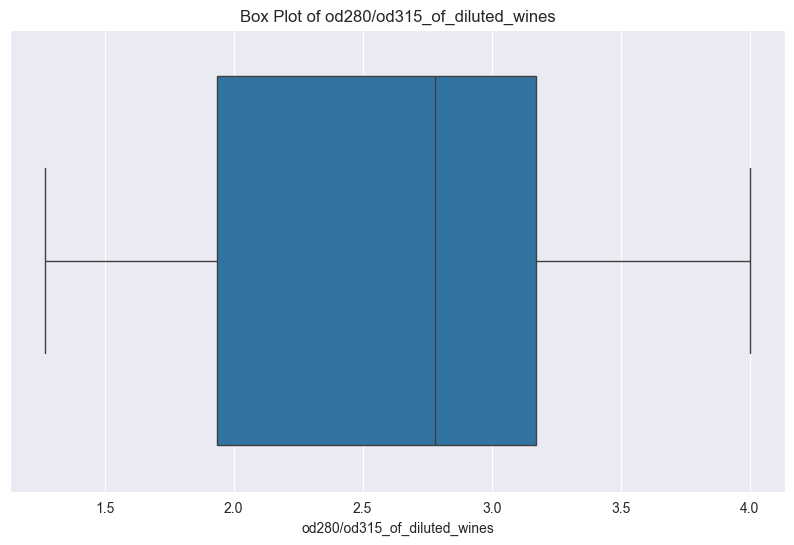

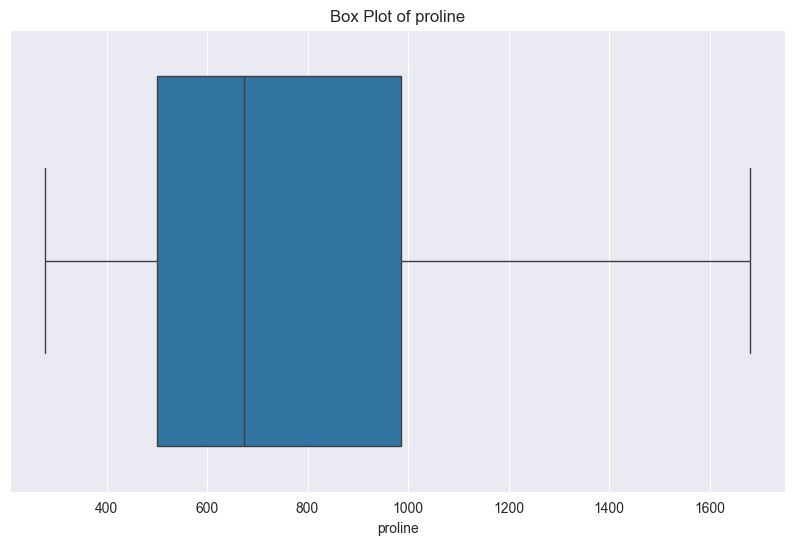

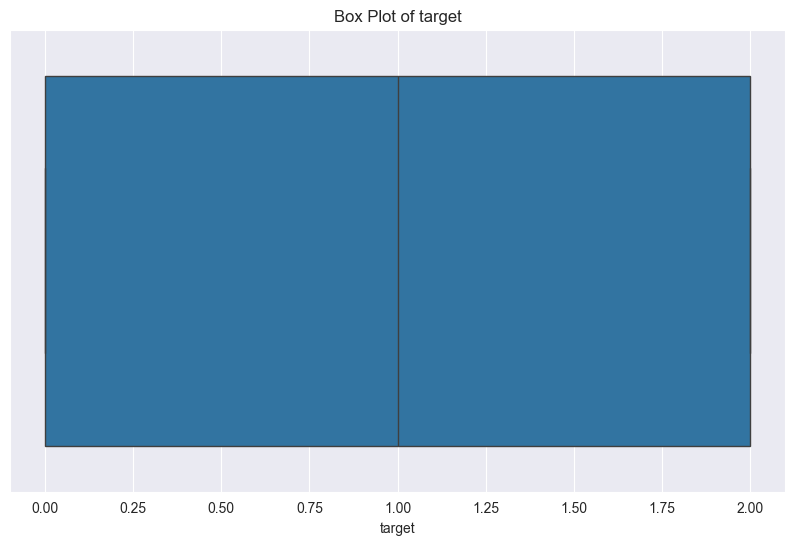

In [8]:
''' CEK OUTLIER DENGAN BOXPLOT DATA '''
import seaborn as sns
import matplotlib.pyplot as plt
for feature in df.columns:
    plt.figure(figsize = (10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f"Box Plot of {feature}")
    plt.show()

***DATA TERHITUNG BERSIH***

# Data Splitting

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Filter Methods

digunakan untuk cek fitur mana yang paling relevan untuk target. Dilakukan
interkasi satu per satu dari fitur ke target. <br>

Salah satu tools yang bisa digunakan adalah **SelectKBest**

In [41]:
filter_selector = SelectKBest(chi2, k = 2) #PILIH 2 FITUR TERBAIK
X_train_filter = filter_selector.fit_transform(X_train, y_train)
X_test_filter = filter_selector.transform(X_test)

print("Fitur yang dipilih dengan Filter Methods: ", filter_selector.get_support(indices=True))

Fitur yang dipilih dengan Filter Methods:  [ 9 12]


In [13]:
nama_kolom = df.columns[9]
kolom_terpilih = df[nama_kolom]
print(kolom_terpilih)

nama_kolom2 = df.columns[12]
kolom_terpilih2 = df[nama_kolom2]
print(kolom_terpilih2)

0       5.64
1       4.38
2       5.68
3       7.80
4       4.32
       ...  
173     7.70
174     7.30
175    10.20
176     9.30
177     9.20
Name: color_intensity, Length: 178, dtype: float64
0      1065.0
1      1050.0
2      1185.0
3      1480.0
4       735.0
        ...  
173     740.0
174     750.0
175     835.0
176     840.0
177     560.0
Name: proline, Length: 178, dtype: float64


**FITUR TERPILIH ADALAH COLOR INTENSITY DAN PROLINE**

# Wrapper Methods
padukan berbagai subset fitur

In [42]:
model = LogisticRegression(solver='lbfgs', max_iter=5000)
rfe_selector = RFE(model, n_features_to_select = 2) #pilih dua fitur khusus
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

print("Fitur yang dipilih dengan Wrapper Methods", rfe_selector.get_support(indices=True))

Fitur yang dipilih dengan Wrapper Methods [0 6]


Solver pada LogisticRegression adalah algoritma yang digunakan untuk menemukan bobot terbaik bagi model, agar prediksi bisa seakurat mungkin. Secara sederhana, solver adalah "mesin" di balik layar yang melakukan perhitungan matematis berulang untuk meminimalkan error model.<br>

Argumen untuk Parameter Solver
Berikut adalah beberapa solver yang paling umum dan argumen yang bisa kamu atur untuknya:<br>

1. lbfgs<br>
lbfgs adalah solver default yang efisien dan cocok untuk dataset kecil hingga menengah.<br>

max_iter: Jumlah iterasi maksimum yang diperbolehkan. Jika model tidak konvergen, kamu bisa mencoba menaikkan nilai ini.

tol (tolerance): Batas error di mana model dianggap sudah konvergen.<br>

2. liblinear<br>
liblinear adalah solver yang sangat cepat, ideal untuk dataset skala besar dan saat kamu hanya membutuhkan regularisasi L1 atau L2.

penalty: Regularisasi yang digunakan. Bisa 'l1' atau 'l2'.

C: Kekuatan regularisasi. Nilai yang lebih kecil berarti regularisasi lebih kuat.<br>

3. newton-cg<br>
newton-cg adalah solver yang juga efisien dan bisa menangani semua jenis regularisasi.

max_iter: Sama seperti lbfgs, mengatur jumlah iterasi maksimum.

tol: Sama seperti lbfgs, mengatur batas toleransi untuk konvergensi.<br>

4. sag dan saga<br>
Kedua solver ini adalah versi stochastic average gradient yang sangat cocok untuk dataset skala sangat besar. saga adalah versi yang lebih fleksibel dari sag dan mendukung regularisasi L1.

max_iter: Mengatur jumlah iterasi maksimum.

tol: Mengatur batas toleransi untuk konvergensi.

In [27]:
nama_kolom = df.columns[11]
kolom_terpilih = df[nama_kolom]
print(kolom_terpilih)

0      3.92
1      3.40
2      3.17
3      3.45
4      2.93
       ... 
173    1.74
174    1.56
175    1.56
176    1.62
177    1.60
Name: od280/od315_of_diluted_wines, Length: 178, dtype: float64


### Fitur terpilih:
1. Alcohol
2. Flavanoids
3. od280/od315_of_diluted_wines

# Embedded Methods

Pilih fitur dan langsung interaksikan dengan variable target. <br>
FITUR DIPILIH SAAT SAAT MODEL DIBANGUN dengan MENGATUR BOBOT. Jadi dilihat dari BOBOT-Nya <br>

Biasanya menggunakan teknik REGULASI seperti Lasso Regression

In [52]:
''' EMBEDDED METHODS '''

# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] #MENGATUR URUTAN TINGKAT KEPENTINGAN SEBUAH FITUR

# Menentukan ambang batas untuk fitur penting
threshold = 0.05 # ambang batas 0.05% -> HANYA FITUR DENGAN BOBOT MINIMAL 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Memindahkan fitur penting ke variabel baru
X_important = X_train[:, important_features_indices] #hanya fitur penting dari data pelatihan
X_test_important = X_test[:, important_features_indices] # hanya fitur penting dari data pengujian

# Cetak fitur dipilih
print("Fitur yang dipilih dengan Embedded Methods(di atas ambang batas): ")
for i in important_features_indices:
    print(f"{data.feature_names[i]}: {importances[i]}")

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting: ", X_important.shape)
print("Dimensi data pengujian dengan fitur penting: ", X_test_important.shape)

Fitur yang dipilih dengan Embedded Methods(di atas ambang batas): 
alcohol: 0.11239773542143086
flavanoids: 0.20229341635663622
color_intensity: 0.1712021830864957
hue: 0.07089132259413944
od280/od315_of_diluted_wines: 0.1115643167260497
proline: 0.13904586955351153

Dimensi data pelatihan dengan fitur penting:  (142, 6)
Dimensi data pengujian dengan fitur penting:  (36, 6)


# EVALUASI PERFORMA

In [53]:
# Evaluasi dengan fitur terpilih dari masing-masing metode
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return accuracy

In [54]:
''' MODEL LOGISTIC REGRESSION DG FILTER METHODS '''
logistic_model_filter = LogisticRegression(max_iter=200)
accuracy_filter = evaluate_model(X_train_filter, X_test_filter, y_train, y_test, logistic_model_filter)

''' MODEL LOGISTIC REGRESSION DG WRAPPER METHODS '''
logistic_model_rfe = LogisticRegression(max_iter=200)
accuracy_rfe = evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test, logistic_model_rfe)

''' MODEL LOGISTIC REGRESSION DG EMBEDDED MODELS '''
accuracy_rf = evaluate_model(X_important, X_test_important, y_train, y_test, rf_model)


In [55]:
print(f"\nAkurasi Model dengan Filter Methods: {accuracy_filter:.2f}")
print(f"Akurasi Model dengan Wrapper Methods: {accuracy_rfe:.2f}")
print(f"Akurasi Model dengan Embedded Methods: {accuracy_rf:.2f}")


Akurasi Model dengan Filter Methods: 0.89
Akurasi Model dengan Wrapper Methods: 0.94
Akurasi Model dengan Embedded Methods: 1.00
